#Assignment 6.- Artificial Neural Network: Feedforward
Guillermo Sebastian Farias Dominguez (2001725)                                   
Ismael Gutierrez Puente (1995316)                                                
Jocelyn Benitez Ramirez (2109461)

Class Day: Thursday                                                              
Hour: N4-N6

#1. Load libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

#2. Load data

In [2]:
# Load data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#3. Data preprocessing

In [3]:
# Data preprocessing
# Normalize the images
train_data = train_data.reshape((train_data.shape[0], 28 * 28)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28 * 28)).astype('float32') / 255
# Encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#4. Model selection and Training

Epoch 1/5
469/469 [==============================] - 16s 28ms/step - loss: 0.2622 - accuracy: 0.9241 - val_loss: 0.1481 - val_accuracy: 0.9549
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.1065 - accuracy: 0.9687 - val_loss: 0.0976 - val_accuracy: 0.9707
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.0748 - val_accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0694 - val_accuracy: 0.9782
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0655 - val_accuracy: 0.9801


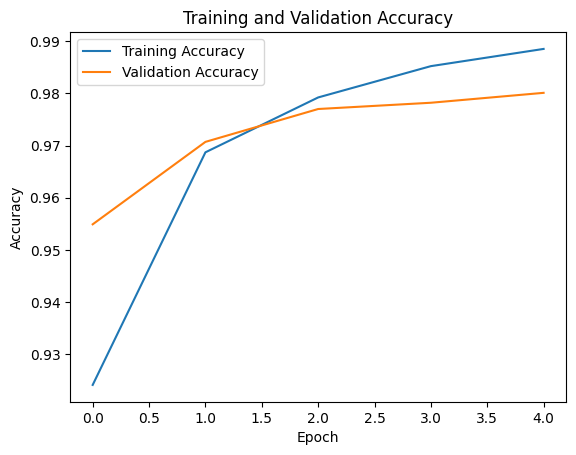

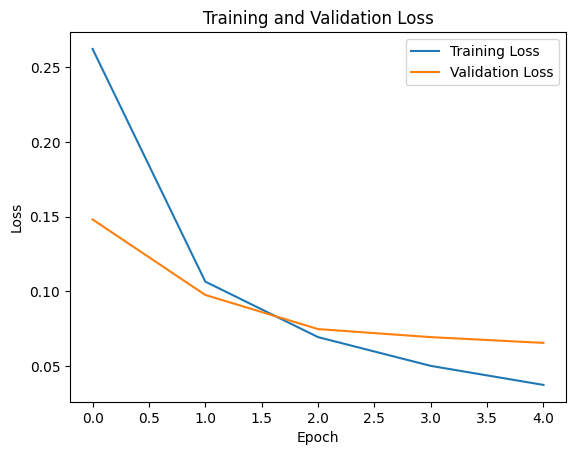

In [4]:
# Model selection and training
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_data=(test_data, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

#5. Model testing

313/313 [==============================] - 2s 5ms/step - loss: 0.0655 - accuracy: 0.9801
Test Accuracy: 0.9800999760627747
1/1 [==============================] - 0s 167ms/step
Prediction: 6
Actual Value: 6


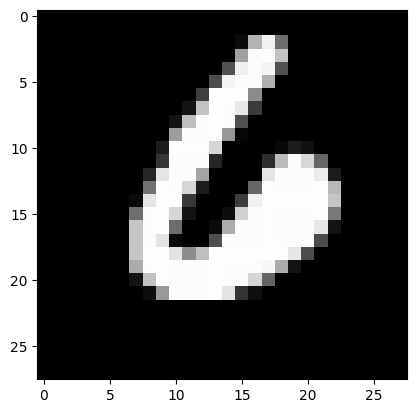

1/1 [==============================] - 0s 30ms/step
Prediction: 3
Actual Value: 3


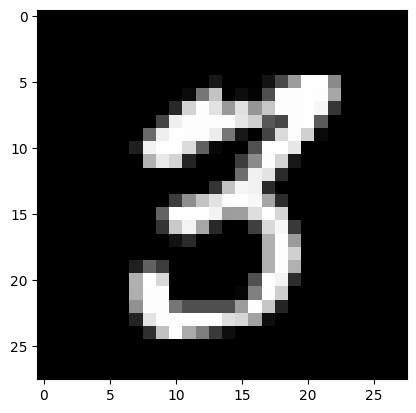

1/1 [==============================] - 0s 36ms/step
Prediction: 3
Actual Value: 3


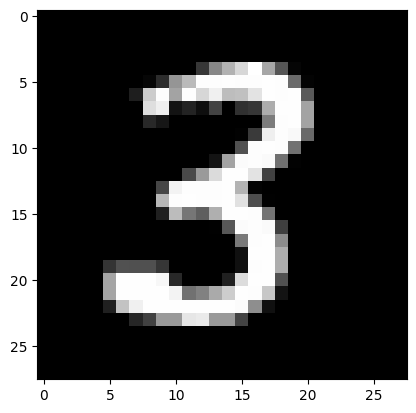

1/1 [==============================] - 0s 23ms/step
Prediction: 8
Actual Value: 8


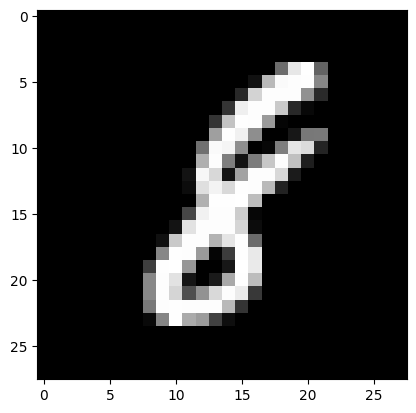

1/1 [==============================] - 0s 25ms/step
Prediction: 9
Actual Value: 9


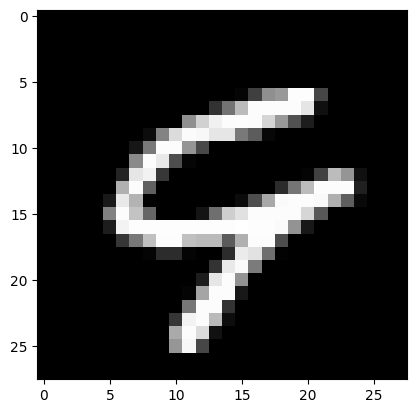

313/313 [==============================] - 1s 2ms/step


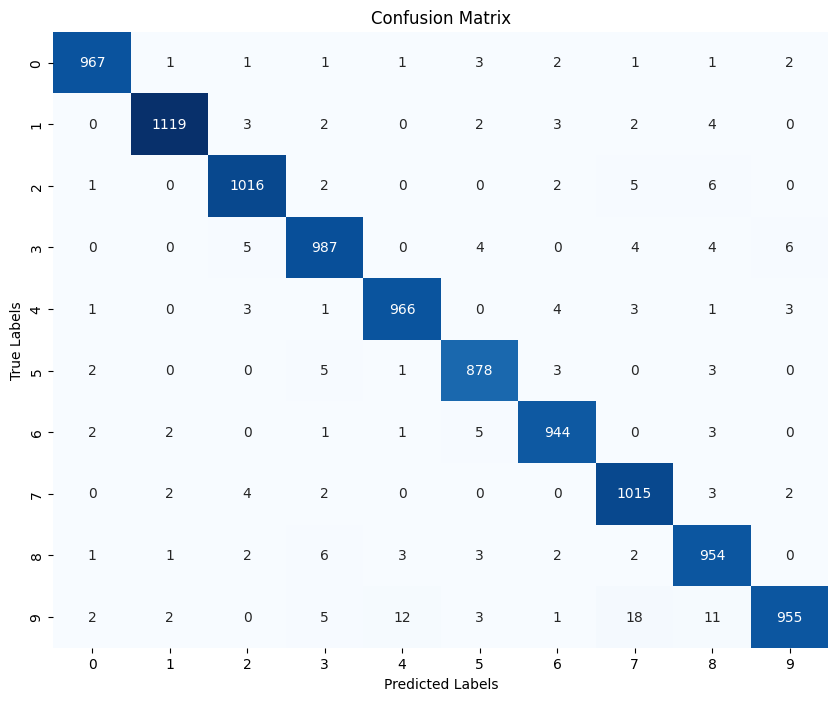

In [5]:
# Model testing
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", accuracy)

# Perform 5 different predictions
for _ in range(5):
    # Choose a random index from the test dataset
    idx = np.random.randint(0, len(test_data))
    # Make prediction
    predicted_label = np.argmax(model.predict(test_data[idx:idx+1]))
    # Display prediction and actual value
    print("Prediction:", predicted_label)
    print("Actual Value:", np.argmax(test_labels[idx]))
    # Plot the image
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.show()

# Confusion Matrix
predicted_labels = np.argmax(model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()